# Unsupervised Learning

It is possible to do unsupervised exploration of the datasets using PCA, tSNE, KMeans and UMAP.

In [ ]:
from deepmol.scalers import MinMaxScaler
from deepmol.loaders import CSVLoader
from deepmol.compound_featurization import TwoDimensionDescriptors

# Load data from CSV file
loader = CSVLoader(dataset_path='../data/CHEMBL217_reduced.csv',
                   smiles_field='SMILES',
                   id_field='Original_Entry_ID',
                   labels_fields=['Activity_Flag'],
                   mode='auto',
                   shard_size=2500)
# create the dataset
data = loader.create_dataset(sep=',', header=0)
TwoDimensionDescriptors().featurize(data, inplace=True)
scaler = MinMaxScaler()
scaler.scale(data, inplace=True)

## PCA

PCA (Principal Component Analysis) is a widely used technique in chemoinformatics, which is the application of computational methods to chemical data. In chemoinformatics, PCA is used to analyze molecular descriptors, which are numerical representations of chemical structures.

Molecular descriptors can be used to represent various aspects of a molecule, such as its size, shape, polarity, or electronic properties. However, molecular descriptor sets can be quite large and highly correlated, making it difficult to extract meaningful information from them.

PCA can help address this problem by reducing the dimensionality of the molecular descriptor space, while preserving as much of the information as possible. Specifically, PCA can identify the most important descriptors that contribute to the variation in the data, and create a smaller set of descriptors that captures the majority of the information in the original data.

The reduced set of descriptors can then be used for various tasks, such as drug design, virtual screening, or molecular similarity analysis. PCA can also be used for visualization and exploration of chemical data, by projecting the high-dimensional descriptor space onto a lower-dimensional space that can be easily visualized.

Overall, PCA is a powerful tool in chemoinformatics that can help extract meaningful information from complex chemical data sets, and facilitate the discovery and design of new drugs and materials.

In [ ]:
from deepmol.unsupervised import PCA

pca = PCA(n_components=2)
pca_df = pca.run(data)
pca.plot(pca_df.X, path='pca_output_2.png')

In [ ]:
pca = PCA(n_components=3)
pca_df = pca.run(data)
pca.plot(pca_df.X, path='pca_output_3.png')

In [ ]:
pca = PCA(n_components=6)
pca_df = pca.run(data)
pca.plot(pca_df.X, path='pca_output_6.png')

# t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) is a popular technique in chemoinformatics for visualizing high-dimensional molecular data in a lower-dimensional space.

In chemoinformatics, t-SNE is often used to explore the structure-activity relationship (SAR) of chemical compounds, by visualizing how similar compounds are clustered in a lower-dimensional space based on their molecular descriptors.

t-SNE works by first computing pairwise similarities between the high-dimensional data points, such as molecular descriptors. These similarities are then used to construct a probability distribution that represents the likelihood of a data point being similar to other data points in the high-dimensional space.

Next, t-SNE creates a similar probability distribution in a lower-dimensional space, and iteratively adjusts the positions of the data points in this space to minimize the difference between the two distributions. The result is a 2D or 3D visualization of the data points, where similar data points are located close to each other, and dissimilar data points are located far apart.

t-SNE is particularly useful for visualizing complex and non-linear relationships in chemoinformatics data, and for identifying clusters or patterns that may not be easily detectable in the original high-dimensional space. However, it should be noted that t-SNE is a non-parametric technique, and its results may depend on the choice of parameters and the specific initialization of the algorithm. Therefore, t-SNE should be used in combination with other techniques, such as PCA or hierarchical clustering, to gain a more comprehensive understanding of the chemical data.

In [ ]:
from deepmol.unsupervised import TSNE

tsne = TSNE(n_components=2)
tsne_df = tsne.run(data)
tsne.plot(tsne_df.X, path='tsne_output_2.png')

In [ ]:
tsne = TSNE(n_components=3)
tsne_df = tsne.run(data)
tsne.plot(tsne_df.X, path='tsne_output_3.png')

In [ ]:
tsne = TSNE(n_components=4, method='exact')
tsne_df = tsne.run(data)
tsne.plot(tsne_df.X, path='tsne_output_4.png')

# KMeans

K-means clustering is a widely used unsupervised learning algorithm in chemoinformatics for identifying groups of similar chemical compounds based on their molecular descriptors.

The algorithm works by iteratively assigning each data point (i.e., chemical compound) to the closest cluster center (i.e., centroid), and updating the cluster centers based on the new assignments. The process continues until the assignments no longer change, or until a maximum number of iterations is reached.

In chemoinformatics, k-means clustering is often used for tasks such as compound clustering, lead optimization, and hit identification. By identifying clusters of similar compounds, researchers can gain insights into the structure-activity relationships (SAR) of the compounds, and identify potential candidates for further study.

However, k-means clustering has some limitations in chemoinformatics. One limitation is that the algorithm assumes that the clusters are spherical and of equal size, which may not always be the case for chemical compounds. Another limitation is that the algorithm requires the number of clusters to be specified in advance, which may be difficult to determine for large and complex data sets.

In [ ]:
from deepmol.unsupervised import KMeans

kmeans = KMeans(n_clusters=2)
kmeans_df = kmeans.run(data)
kmeans.plot(kmeans_df.X, path='kmeans_output_2.png')

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans_df = kmeans.run(data)
kmeans.plot(kmeans_df.X, path='kmeans_output_3.png')

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans_df = kmeans.run(data)
kmeans.plot(kmeans_df.X, path='kmeans_output_6.png')

# UMAP

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that has gained popularity in chemoinformatics for visualizing and analyzing high-dimensional molecular data.

Like t-SNE, UMAP works by creating a lower-dimensional representation of the high-dimensional data, but it uses a different approach based on topology and geometry. UMAP constructs a high-dimensional graph that captures the local relationships between the data points, and then uses a mathematical technique called Riemannian geometry to embed the graph into a lower-dimensional space.

In chemoinformatics, UMAP has been used for tasks such as compound clustering, lead optimization, and molecular visualization. UMAP can reveal complex and non-linear relationships in the data that may not be easily visible in the original high-dimensional space, and it can provide insights into the structure-activity relationships (SAR) of the compounds.

One advantage of UMAP over other dimensionality reduction techniques is its scalability and speed. UMAP can handle large and complex data sets, and can produce visualizations in real-time. Moreover, UMAP has a few parameters that can be tuned, making it easy to use and apply in various chemoinformatics applications.

In [ ]:
from deepmol.unsupervised import UMAP

ump = UMAP(n_components=2)
umap_df = ump.run(data)
ump.plot(umap_df.X, path='umap_output_2.png')

In [ ]:
ump = UMAP(n_components=3)
umap_df = ump.run(data)
ump.plot(umap_df.X, path='umap_output_3.png')

In [ ]:
ump = UMAP(n_components=6)
umap_df = ump.run(data)
ump.plot(umap_df.X, path='umap_output_6.png')

# Do your own analysis

You can always generate the data yourself for any of these unsupervised learning methods and plot them the way you want. Let's try it out with PCA.

In [43]:
from deepmol.unsupervised import PCA

pca = PCA(n_components=2)
pca_df = pca.run(data)

The principal components are stored in the X attribute of the dataset object. So, one can access this information by typing:

In [44]:
pca_df.X

array([[-0.5702929 ,  0.34961516],
       [ 0.4019284 ,  0.25011715],
       [ 0.4814127 , -0.29691637],
       ...,
       [-0.67021173,  0.7563012 ],
       [-1.295675  ,  0.05596984],
       [-0.5351163 , -0.29156607]], dtype=float32)

Accordingly you can plot the data using matplotlib or any other plotting library of your choice.

Text(0.5, 1.0, 'PCA')

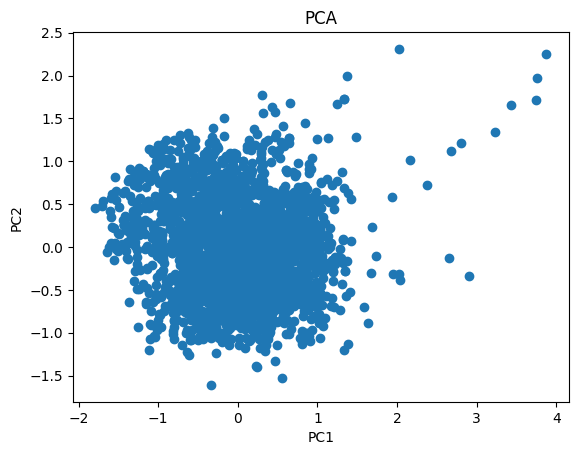

In [45]:
import matplotlib.pyplot as plt

plt.scatter(pca_df.X[:, 0], pca_df.X[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')